In [31]:
import pandas as pd
import numpy as np

In [32]:
data = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/census.csv')
df = pd.DataFrame(data)

In [33]:
df.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME         CTYNAME  \
0      40       3         6      1       0  Alabama         Alabama   
1      50       3         6      1       1  Alabama  Autauga County   
2      50       3         6      1       3  Alabama  Baldwin County   
3      50       3         6      1       5  Alabama  Barbour County   
4      50       3         6      1       7  Alabama     Bibb County   

   CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  RDOMESTICMIG2011  \
0        4779736            4780127          4785161  ...          0.002295   
1          54571              54571            54660  ...          7.242091   
2         182265             182265           183193  ...         14.832960   
3          27457              27457            27341  ...         -4.728132   
4          22915              22919            22861  ...         -5.527043   

   RDOMESTICMIG2012  RDOMESTICMIG2013  RDOMESTICMIG2014  RDOMESTICMIG2015  \
0         -0.193196          0.381066          0.582002         -0.467369   
1         -2.915927         -3.012349          2.265971         -2.530799   
2         17.647293         21.845705         19.243286         17.197872   
3         -2.500690         -7.056824         -3.904217        -10.543299   
4         -5.068871         -6.201001         -0.177537          0.177258   

   RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
0     1.030015     0.826644     1.383282     1.724718     0.712594  
1     7.606016    -2.626146    -2.722002     2.592270    -2.187333  
2    15.844176    18.559627    22.727626    20.317142    18.293499  
3    -4.874741    -2.758113    -7.167664    -3.978583   -10.543299  
4    -5.088389    -4.363636    -5.403729     0.754533     1.107861  

[5 rows x 100 columns]

In [34]:
df.shape

(3193, 100)

In [35]:
df.dtypes

SUMLEV           int64
REGION           int64
DIVISION         int64
STATE            int64
COUNTY           int64
                ...   
RNETMIG2011    float64
RNETMIG2012    float64
RNETMIG2013    float64
RNETMIG2014    float64
RNETMIG2015    float64
Length: 100, dtype: object

#### Looks like a lot of the numerical data is likely already in numeric form. Let's double check.

In [36]:
for col_name in df.columns:
    if df[col_name].dtypes != 'int64' and  df[col_name].dtypes != 'float64':
        print(col_name)
    else:
        continue

STNAME
CTYNAME


#### Only STNAME and CTYNAME are not numeric; as we can see above, these are names of states and counties --- they should not be numeric.

In [48]:
df.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013',
       'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMI

In [49]:
list(df['STNAME'].unique())

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

* All of the states are accounted for in the dataset.

# Descriptive Analytics

* What do we want to accomplish here (in general)?

    * Where were the most births?
    
    * Where were the most deaths?
    
    * Where are the most migrants, domestic?
    
    * Where are the biggest populations found, as it relates to counties?


#### A. Where were the most births?

- The range of the data is from 2010 to 2015


- We want to understand where the births are happening


- First and foremost, we can look at what is happening region by region and go from there

   
    - There are 4 regions

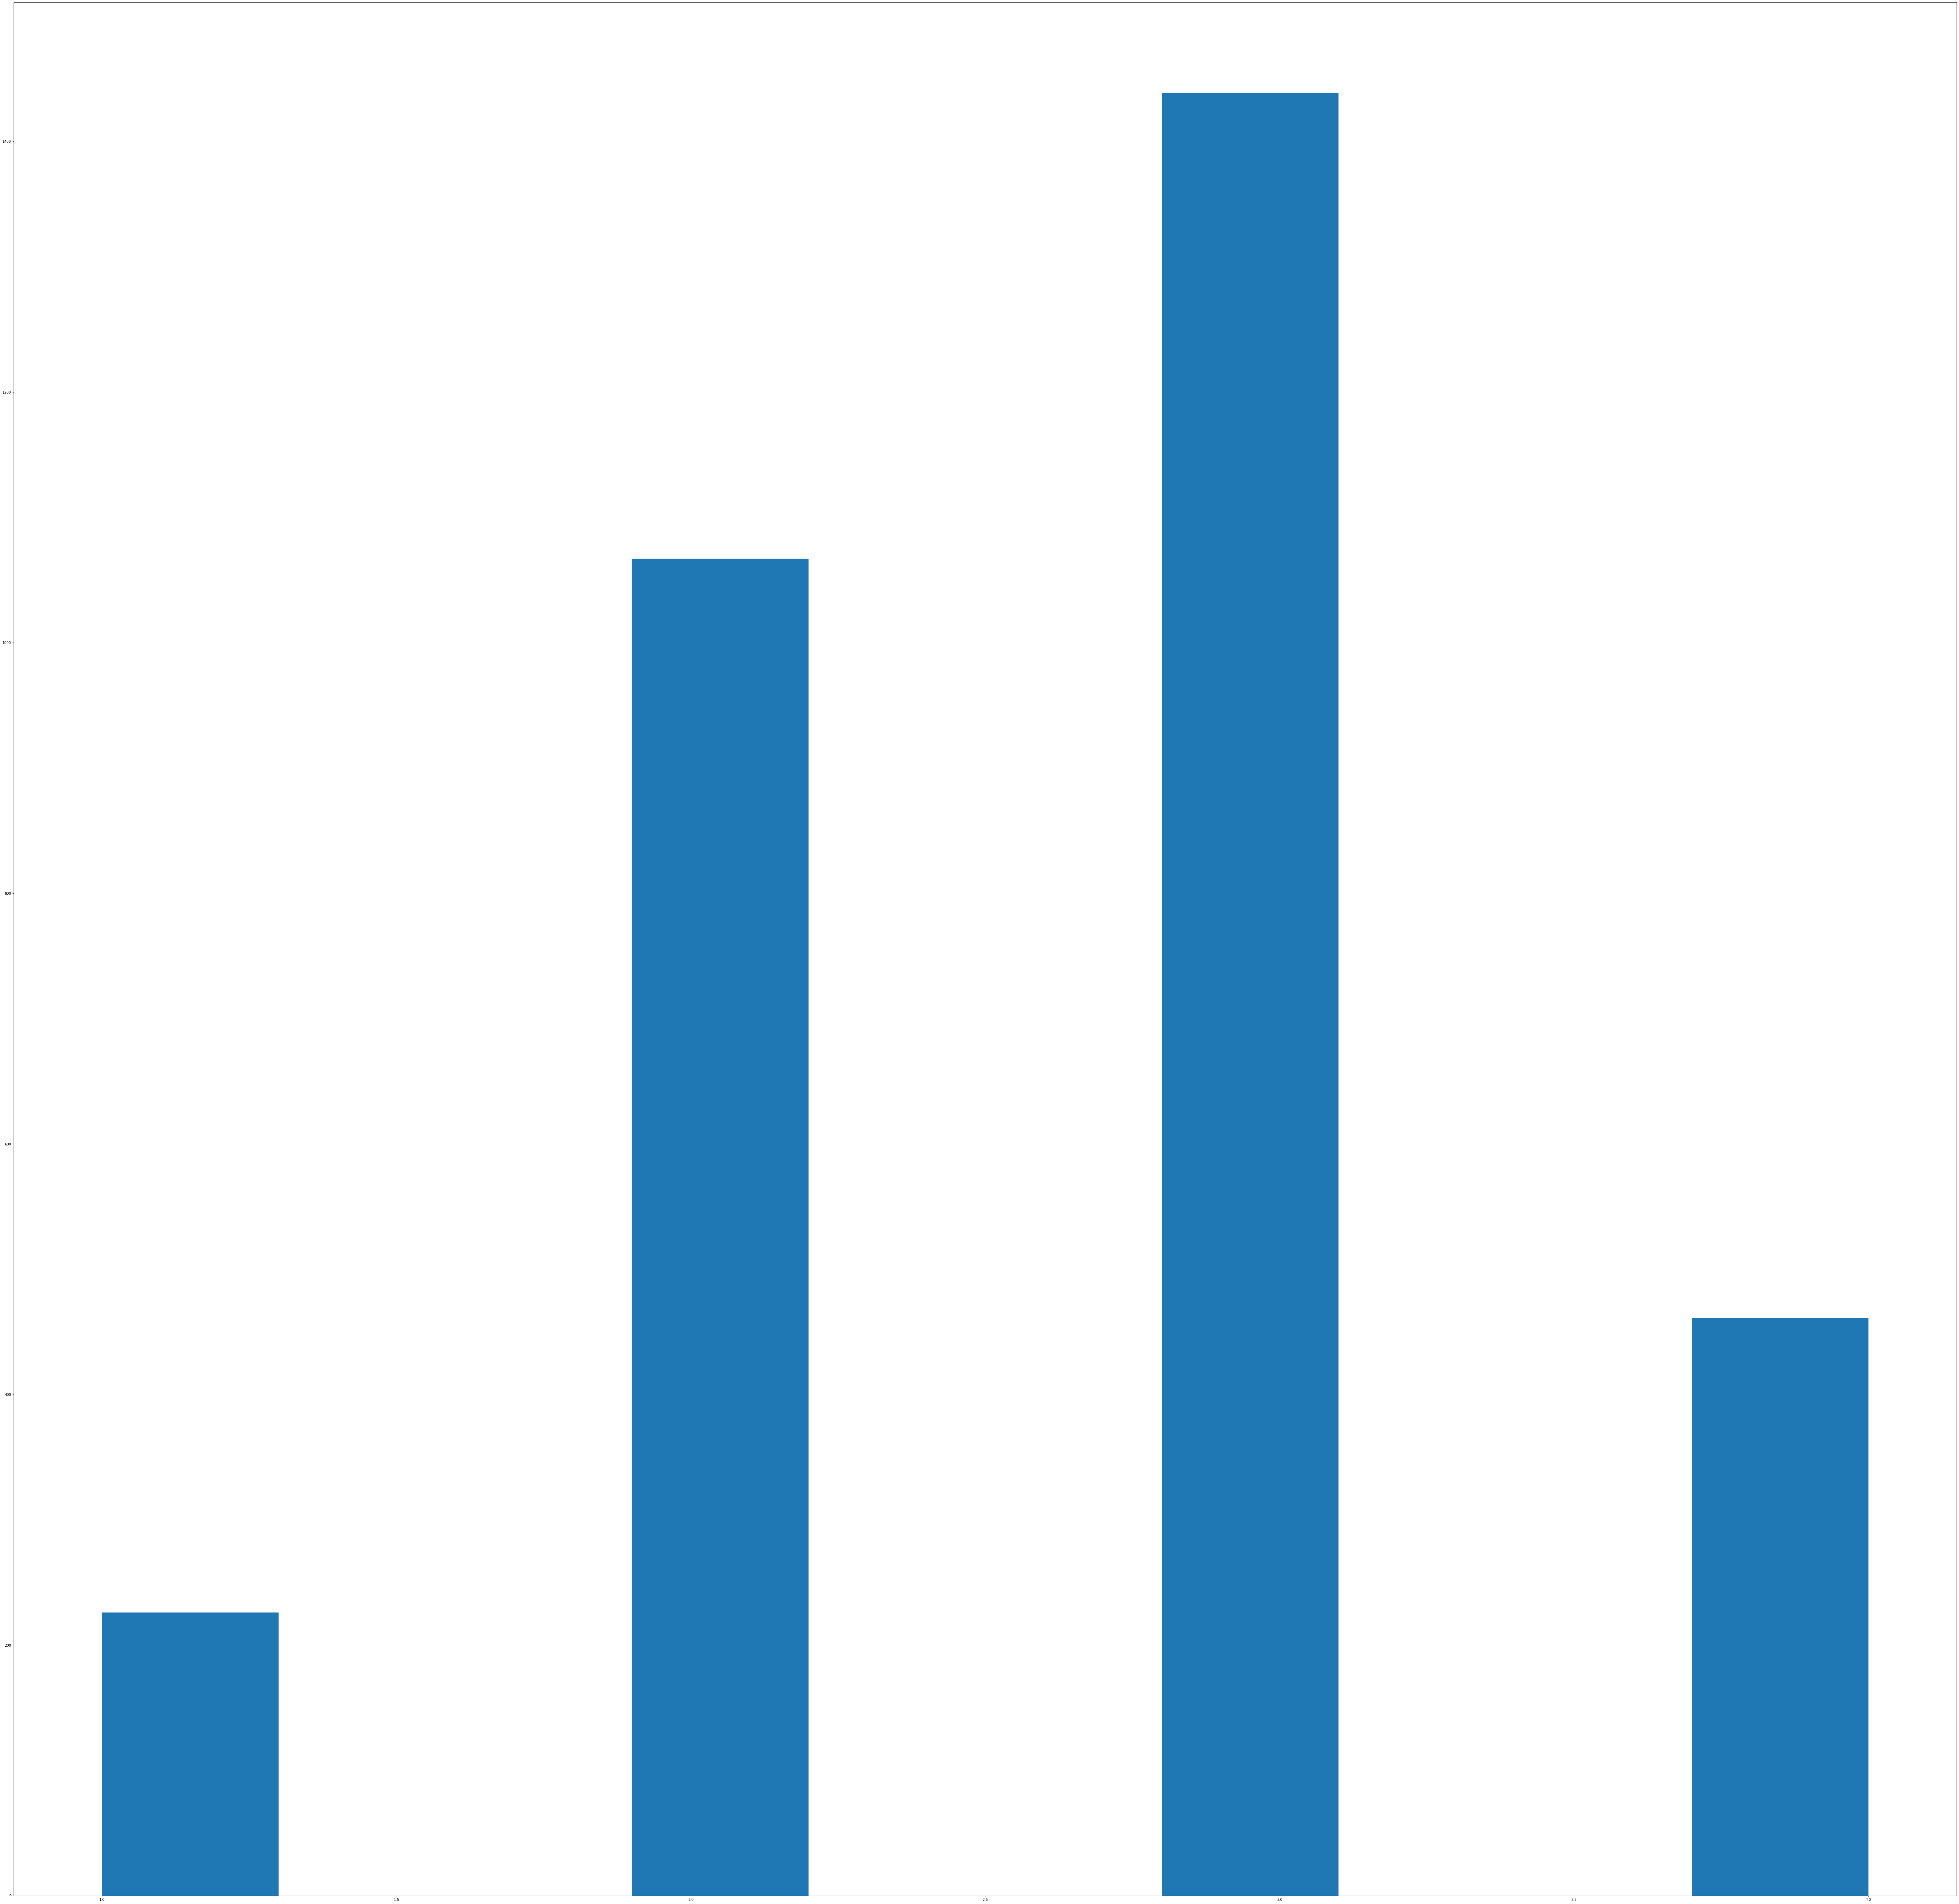

In [73]:
plt.hist(df['REGION'])

plt.show()

* It looks like a few of the bins have a majority of the data (Region 2 and Region 3 have most of the counties, for example).


* Let's see how births are dispersed based on region, annually.

In [81]:
#Create different dataframes based on region

df1 = df[df["REGION"] == 1]
df2 = df[df["REGION"] == 2]
df3 = df[df["REGION"] == 3]
df4 = df[df["REGION"] == 4]

In [109]:
fig = plt.figure()

# setting font size to 30
plt.rcParams.update({'font.size': 100})

ax = fig.add_axes([0,0,1,1])
regions = ['Region1', 'Region2', 'Region3', 'Region4']
births = [df1['BIRTHS2015'].sum(),df2['BIRTHS2015'].sum(),df3['BIRTHS2015'].sum(),df4['BIRTHS2015'].sum()]
ax.set_title('Regions vs 2015 Births')
ax.set_xlabel('Regions')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Region1', 'Region2', 'Region3', 'Region4'])
ax.set_ylabel('Births in 2015')
ax.set_yticks([0,1000000,2000000, 3000000])
ax.bar(regions,births)
plt.show()

* Basically follows concentration of regions in original dataset (verified that it is this way from 2010 to 2015); interestingly, region 4 had more births than region 2 in 2015, though far more region 2 entities than region 4, as seen in the graph above this one...


* What's a clear percentage of births occurring in Region 3?


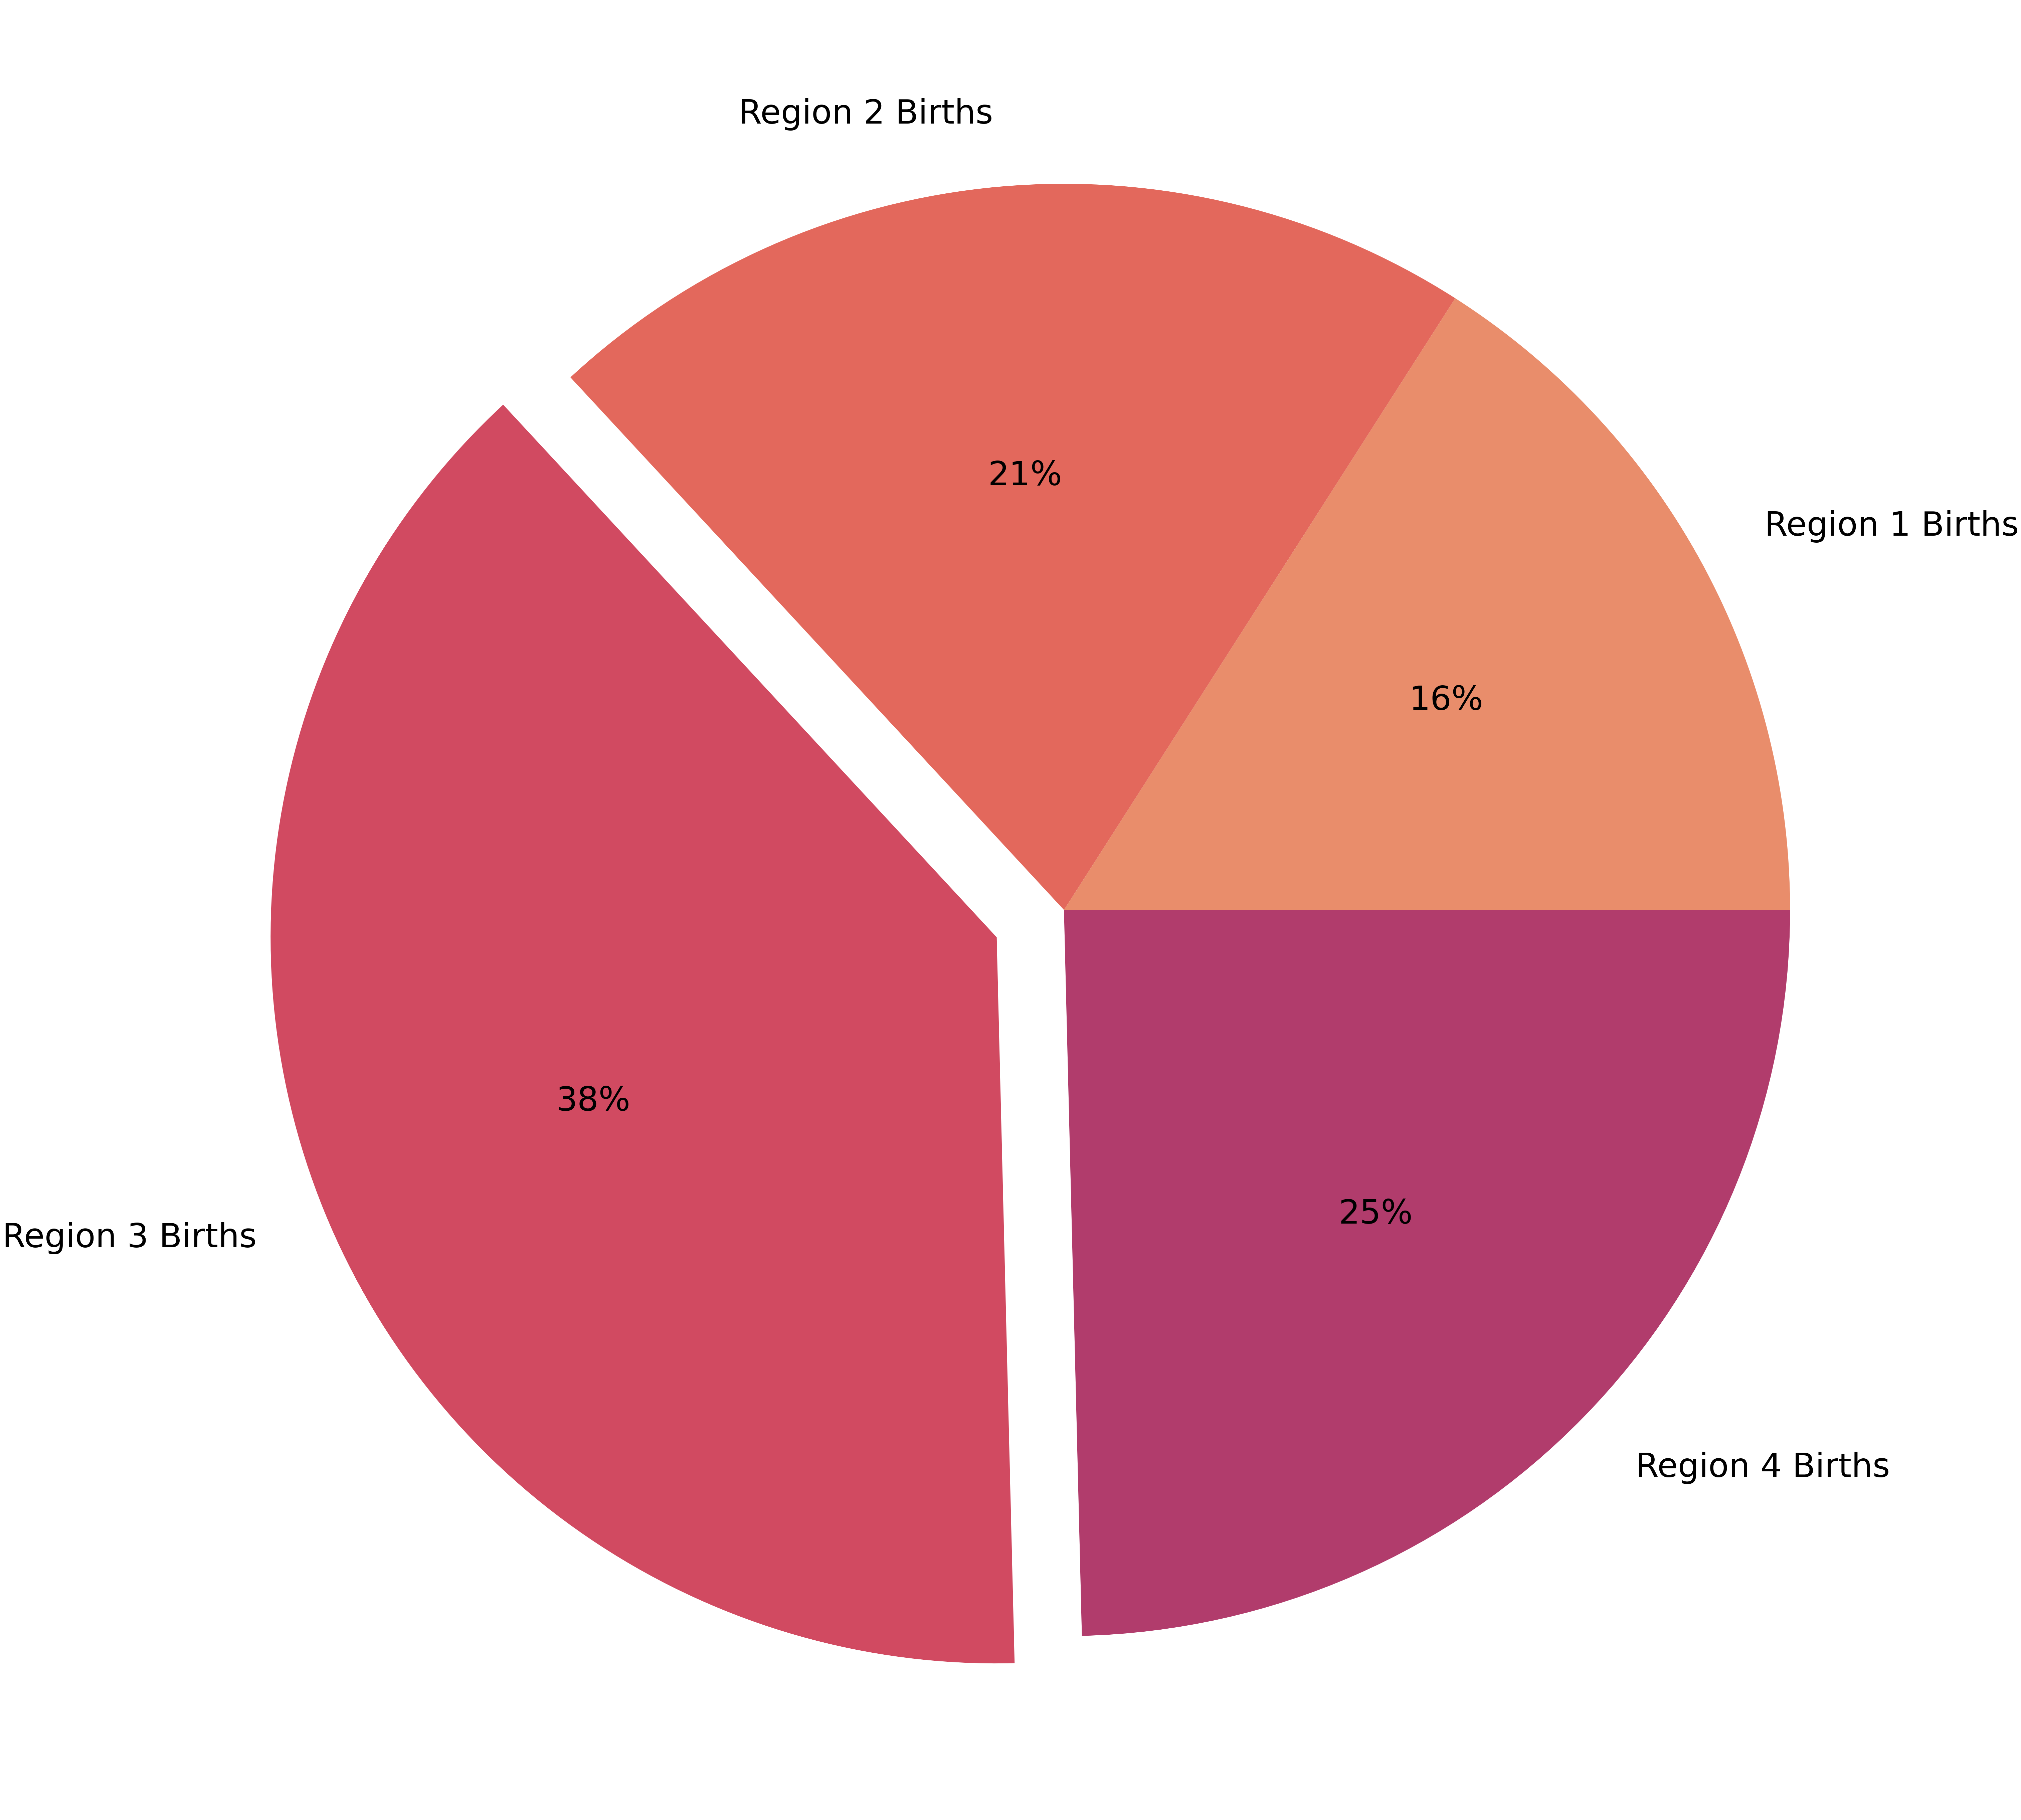

In [268]:
import matplotlib.pyplot as plt
import seaborn
  
# declaring data
data = [df1['BIRTHS2015'].sum()/df['BIRTHS2015'].sum(), df2['BIRTHS2015'].sum()/df['BIRTHS2015'].sum(),
        df3['BIRTHS2015'].sum()/df['BIRTHS2015'].sum(), df4['BIRTHS2015'].sum()/df['BIRTHS2015'].sum()]
keys = ['Region 1 Births', 'Region 2 Births', 'Region 3 Births', 'Region 4 Births']
  
# declaring exploding pie
explode = [0, 0, 0.1, 0]
# define Seaborn color palette to use
palette_color = seaborn.color_palette('flare')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

* Almost 40% of all births occurred in Region 3.


* What are the places that exist in Region 2 vs Region 4?

In [114]:
list(df2['STNAME'].unique()) #geopandas

['Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'Ohio',
 'South Dakota',
 'Wisconsin']

In [115]:
list(df4['STNAME'].unique()) #geopandas

['Alaska',
 'Arizona',
 'California',
 'Colorado',
 'Hawaii',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Oregon',
 'Utah',
 'Washington',
 'Wyoming']

* The trend remains similar in all years available in the dataset, going back to 2010; the most births annually take place in region 3, then second region 4, third region 2, and last region 1.


* Let us find where the most births are occurring in region 3.

In [127]:
df3['STNAME'].unique()

array(['Alabama', 'Arkansas', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland',
       'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina',
       'Tennessee', 'Texas', 'Virginia', 'West Virginia'], dtype=object)

In [152]:
# Create states as identifiers

Alabama = 0
Arkansas = 0
Delaware = 0
District_of_Columbia = 0
Florida = 0
Georgia = 0
Kentucky = 0
Louisiana = 0
Maryland = 0
Mississippi = 0
North_Carolina = 0
Oklahoma = 0
South_Carolina = 0
Tennessee = 0
Texas = 0
Virginia = 0
West_Virginia = 0

In [155]:
#df.iloc[0]['STNAME']

for index in range(df.shape[0]):
    if df.iloc[index]['STNAME'] == 'Alabama':
        Alabama += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'Arkansas':
        Arkansas += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'Delaware':
        Delaware += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'District of Columbia':
        District_of_Columbia += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'Florida':
        Florida += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'Georgia':
        Georgia += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'Kentucky':
        Kentucky += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'Louisiana':
        Louisiana += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'Maryland':
        Maryland += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'Mississippi':
        Mississippi += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'North Carolina':
        North_Carolina += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'Oklahoma':
        Oklahoma += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'South Carolina':
        South_Carolina += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'Tennessee':
        Tennessee += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'Texas':
        Texas += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'Virginia':
        Virginia += int(df['BIRTHS2015'][index])
    elif df.iloc[index]['STNAME'] == 'West Virginia':
        West_Virginia += int(df['BIRTHS2015'][index])

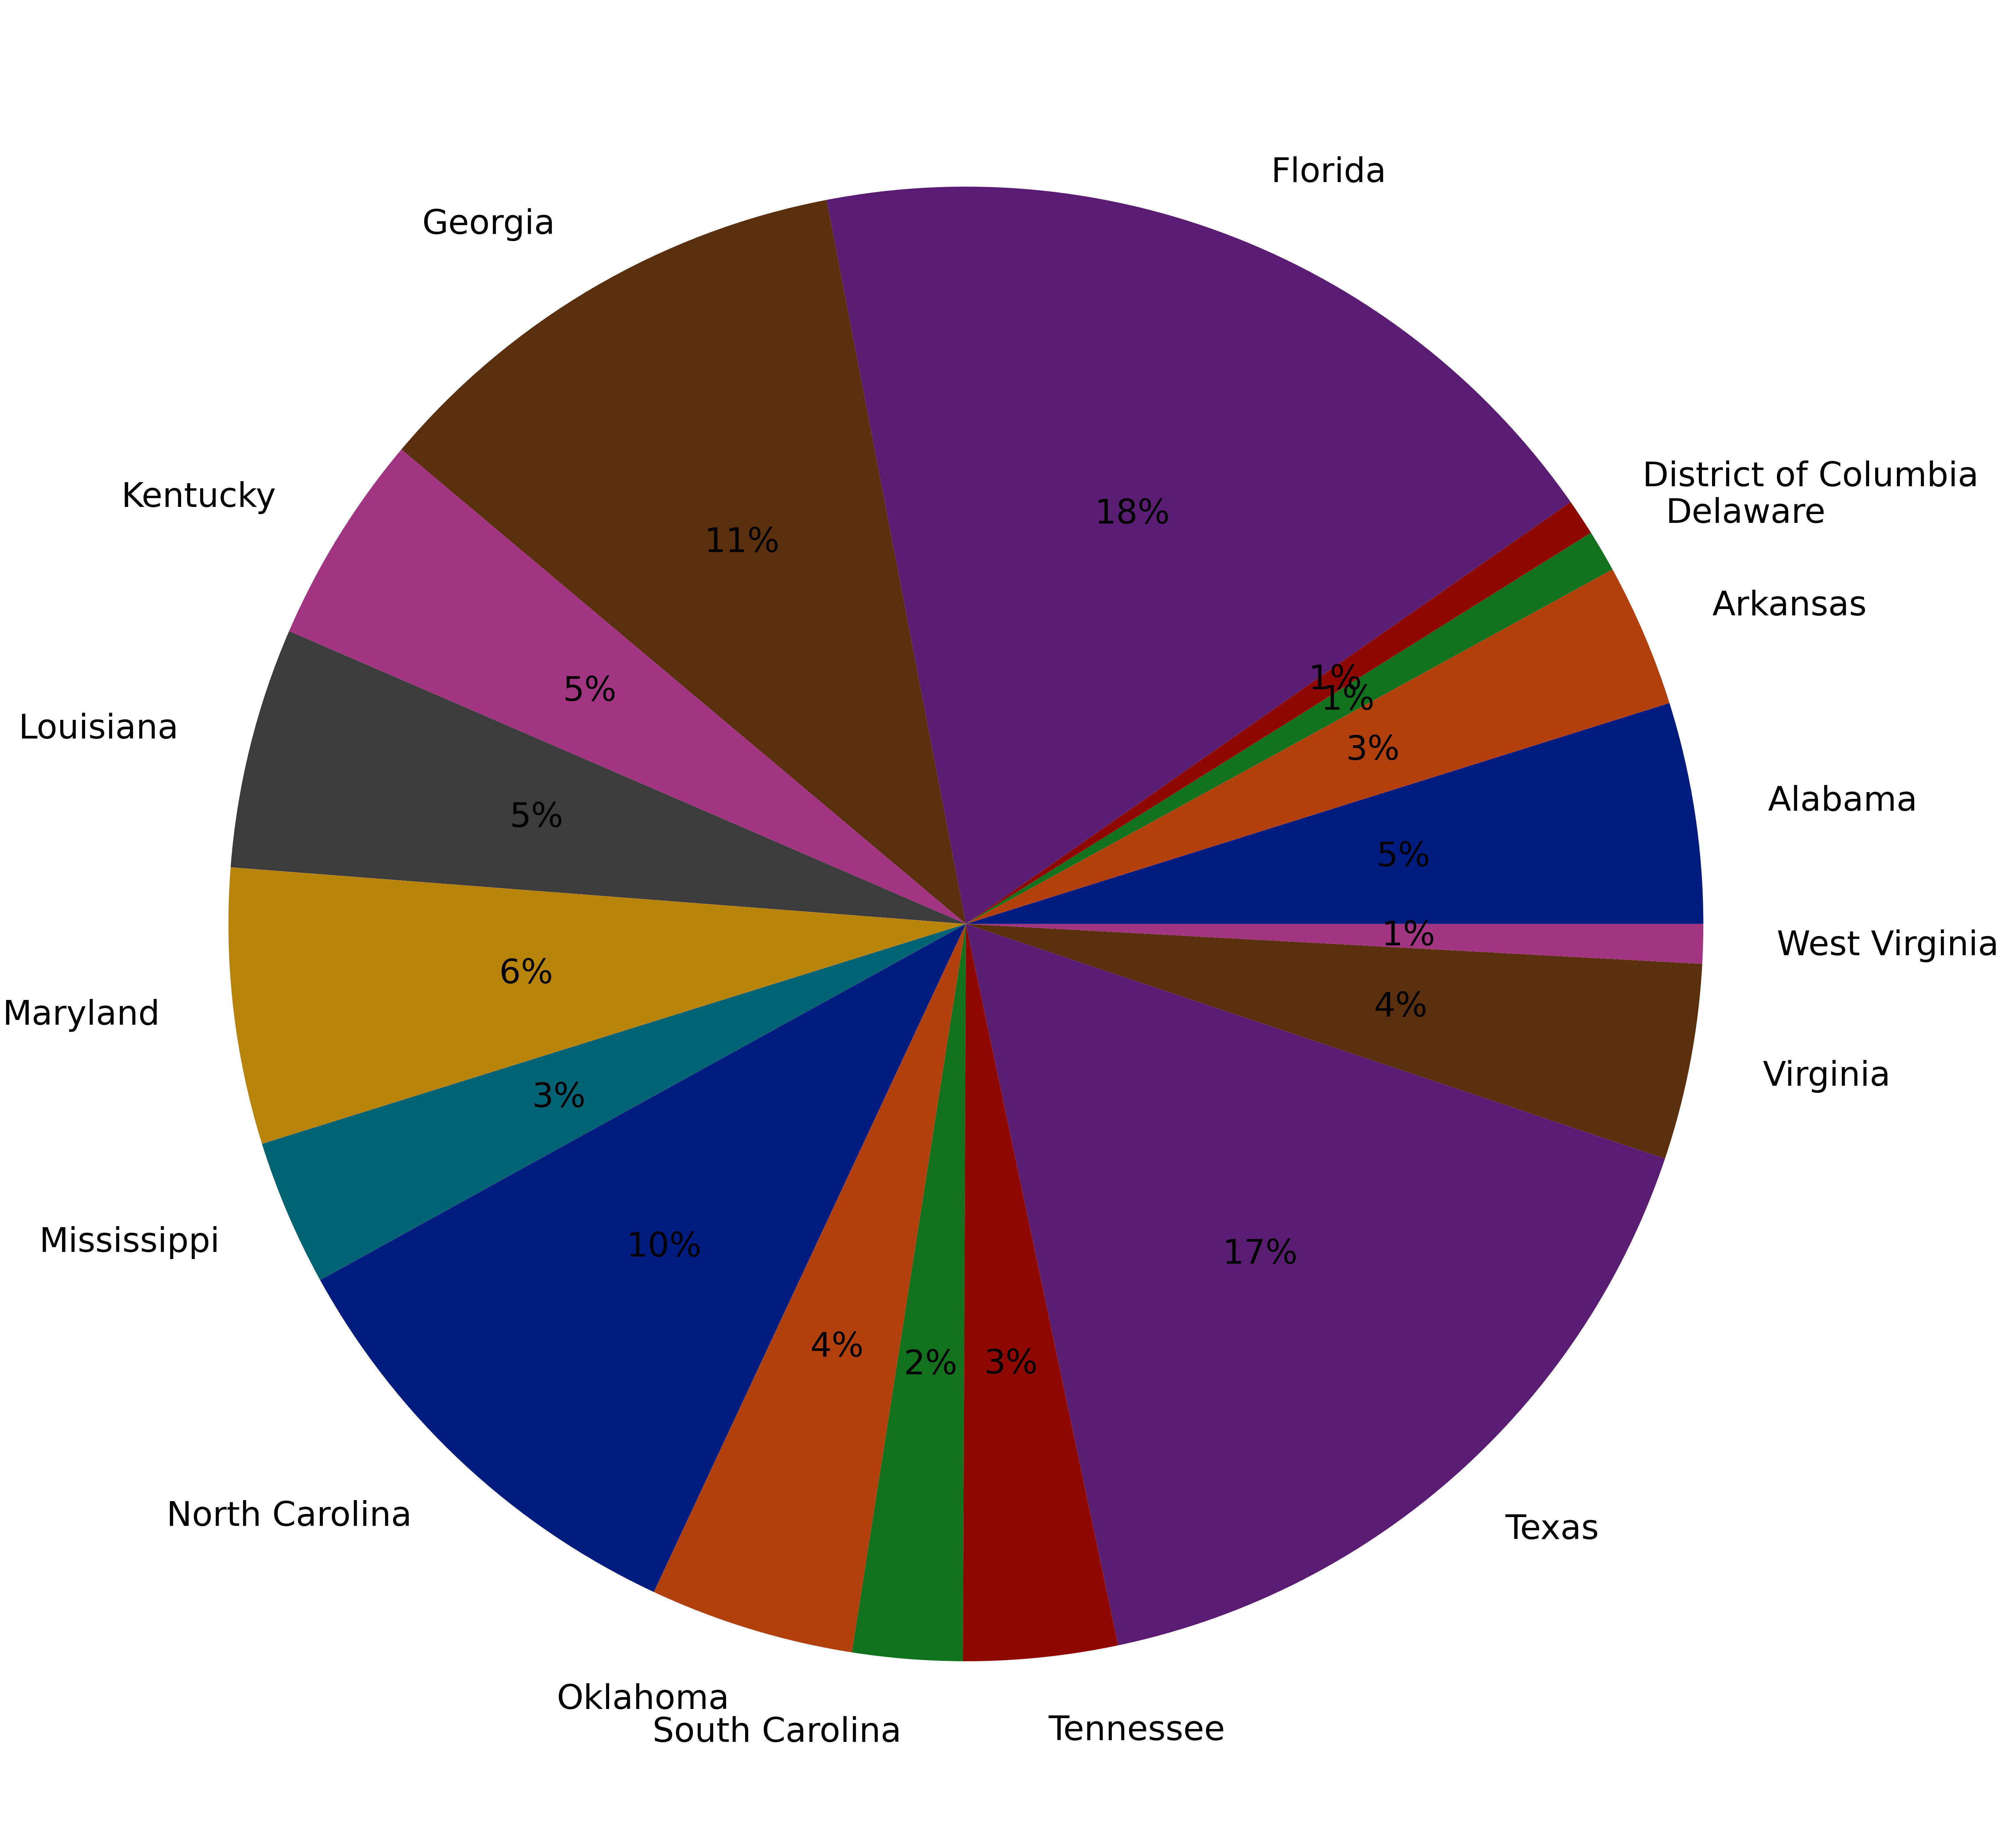

In [160]:
import matplotlib.pyplot as plt
import seaborn
  
# declaring data
data = [Alabama, Arkansas, Delaware, District_of_Columbia, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi,
        North_Carolina, Oklahoma, South_Carolina, Tennessee, Texas, Virginia, West_Virginia]
keys = list(df3['STNAME'].unique())
  
# declaring exploding pie
# explode = [0, 0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = seaborn.color_palette('dark')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

* The significant births (>= 10%) occurred in Florida (18%), Texas (17%), Georgia (11%) and North Carolina (10%)


* Solid amount of births (>= 5%) occurred in Maryland (6%), Kentucky (5%), Louisiana (5%), and Alabama (5%)


* Similar concentration of births dating back to 2010


* What is the trend in absolute births in this region over the years?

737504
3019186
3009972
3009528
3043866
3068992


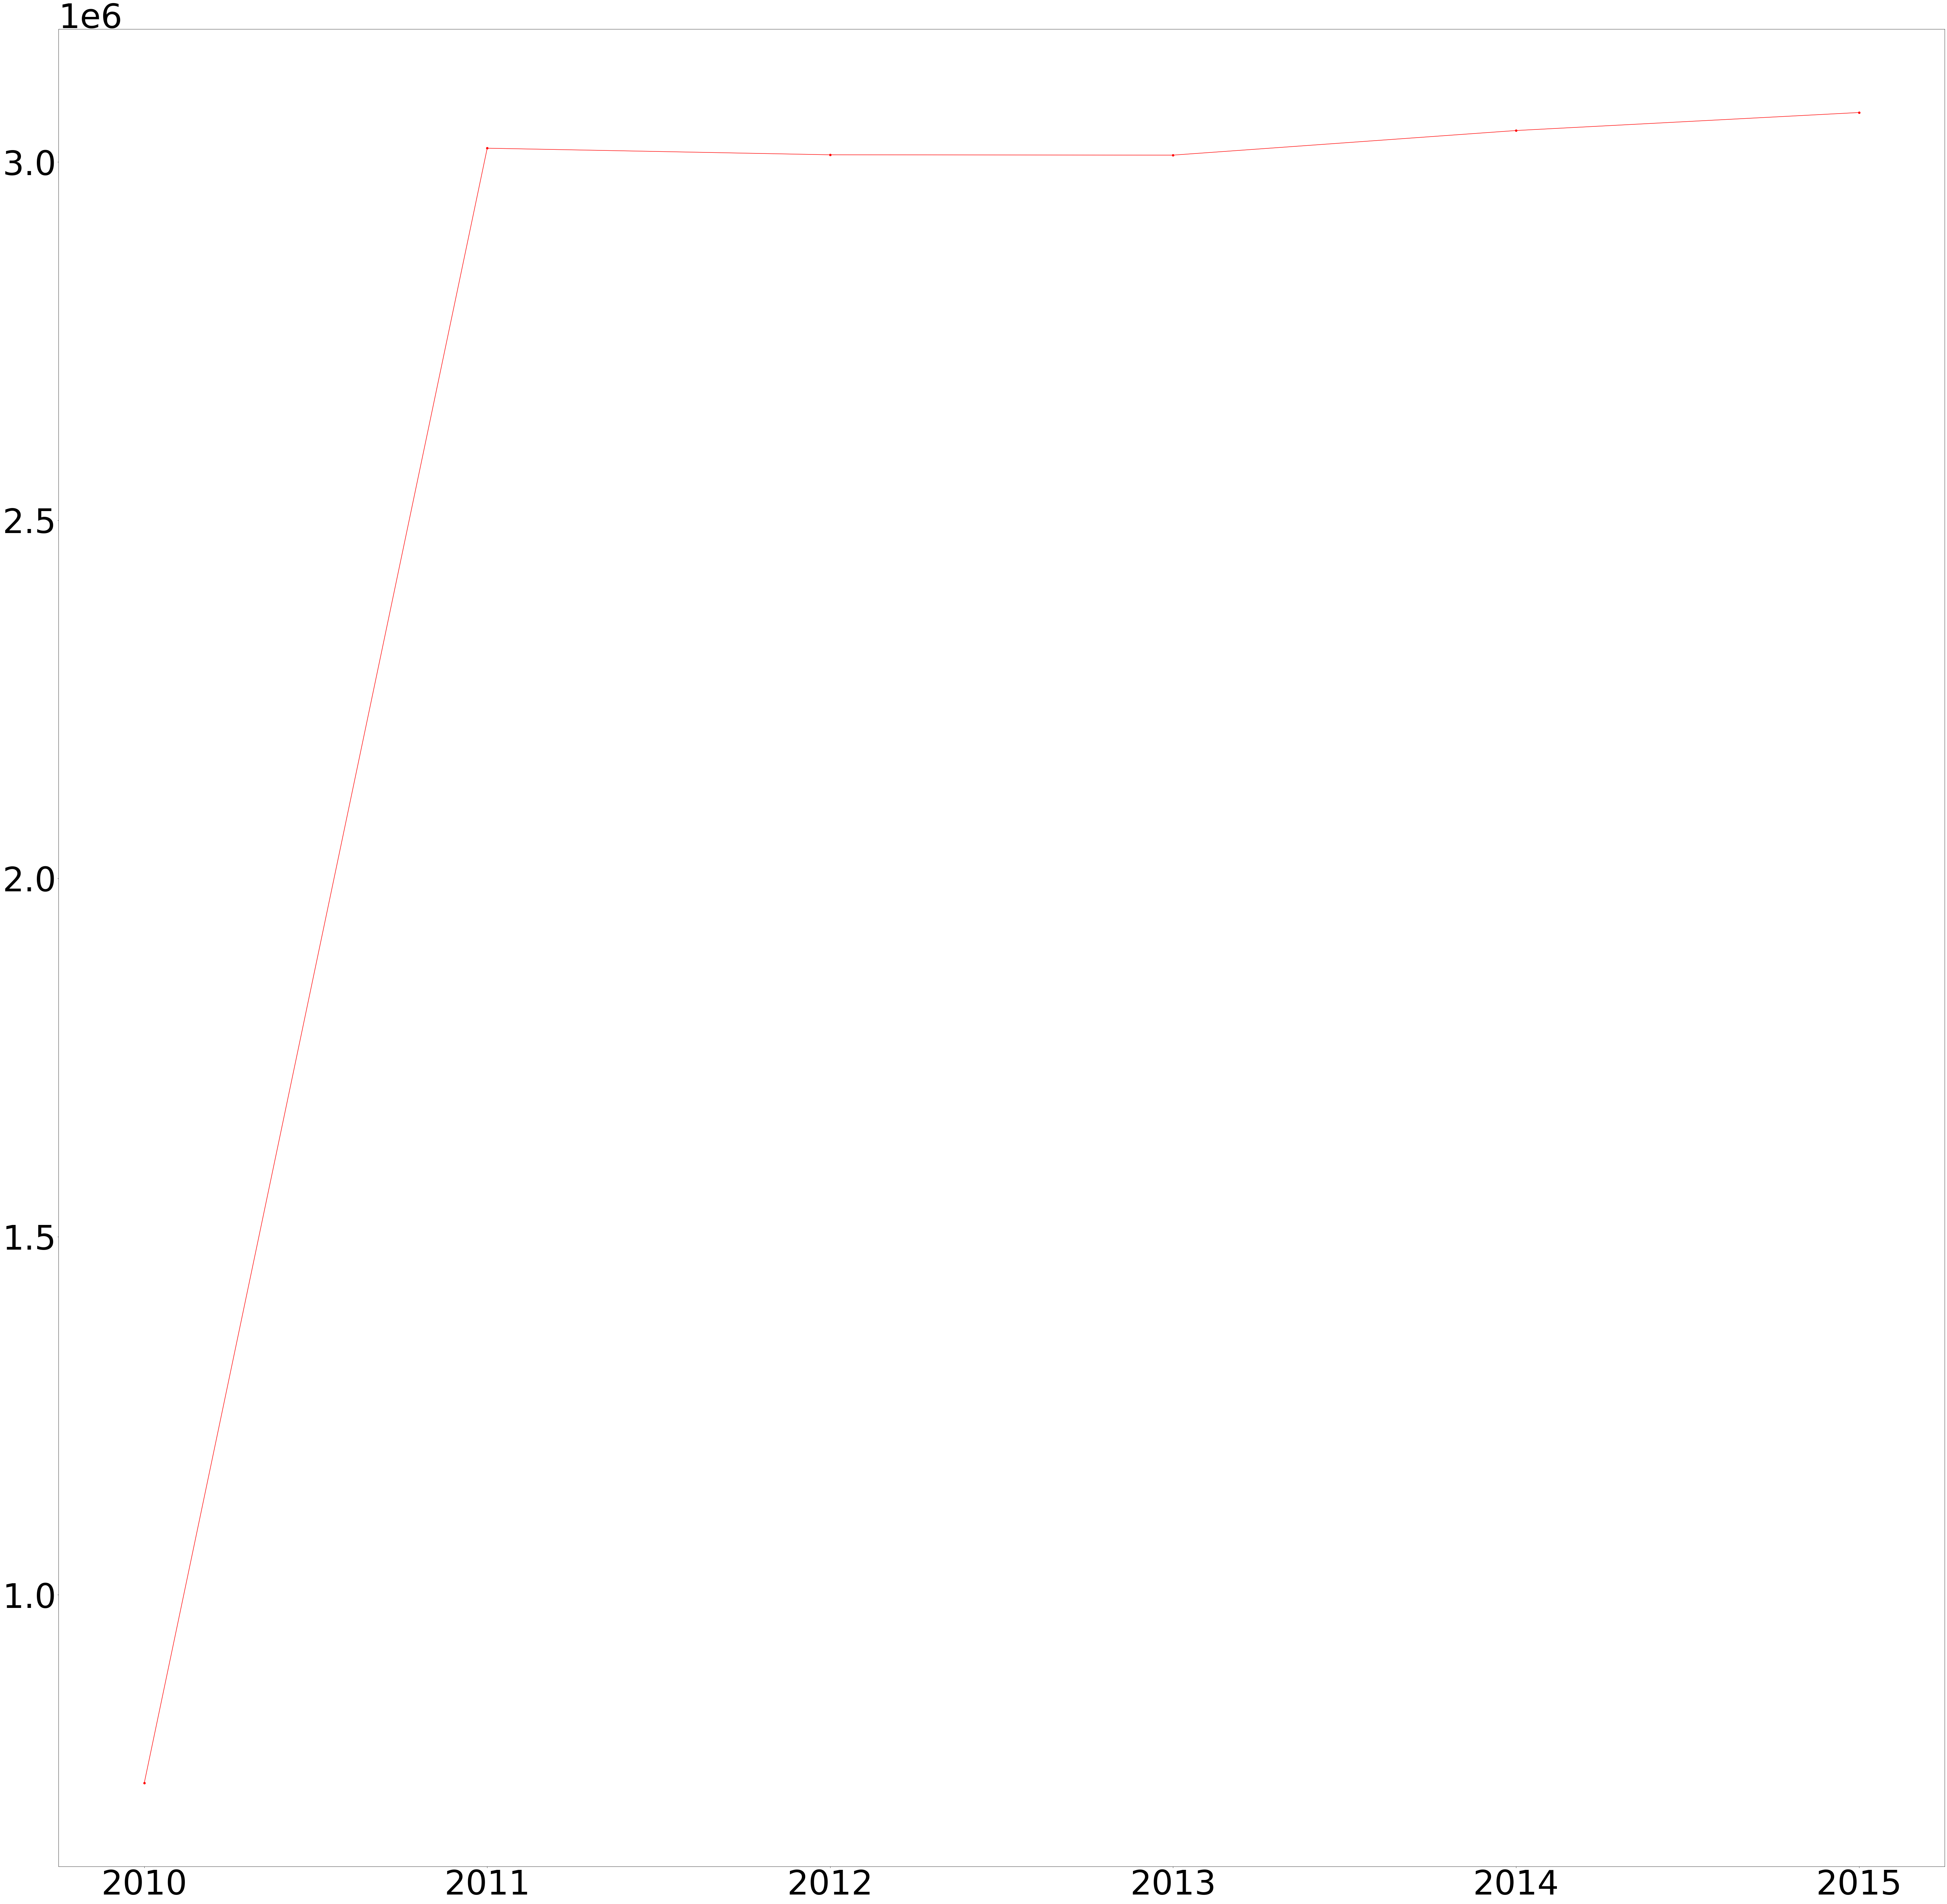

In [186]:
sum1 = df3["BIRTHS2010"].sum(); print(sum1)
sum2 = df3["BIRTHS2011"].sum(); print(sum2)
sum3 = df3["BIRTHS2012"].sum(); print(sum3)
sum4 = df3["BIRTHS2013"].sum(); print(sum4)
sum5 = df3["BIRTHS2014"].sum(); print(sum5)
sum6 = df3["BIRTHS2015"].sum(); print(sum6)


plt.plot([2010, 2011, 2012, 2013, 2014, 2015], [737504, 3019186, 3009972, 3009528, 3043866, 3068992], color='red', marker='o')
plt.show()

* After 2010, birth rates are pretty steady in 2010. What is it that happened that made 2010 such a low birth rate year?


* Can we determine this phenomena occurs in each region?

In [187]:
sum1 = df2["BIRTHS2010"].sum(); print(sum1)
sum2 = df2["BIRTHS2011"].sum(); print(sum2)
sum3 = df2["BIRTHS2012"].sum(); print(sum3)
sum4 = df2["BIRTHS2013"].sum(); print(sum4)
sum5 = df2["BIRTHS2014"].sum(); print(sum5)
sum6 = df2["BIRTHS2015"].sum(); print(sum6)

425250
1669786
1661398
1661702
1666588
1670210


In [188]:
sum1 = df1["BIRTHS2010"].sum(); print(sum1)
sum2 = df1["BIRTHS2011"].sum(); print(sum2)
sum3 = df1["BIRTHS2012"].sum(); print(sum3)
sum4 = df1["BIRTHS2013"].sum(); print(sum4)
sum5 = df1["BIRTHS2014"].sum(); print(sum5)
sum6 = df1["BIRTHS2015"].sum(); print(sum6)

326842
1292520
1275768
1271530
1263240
1270972


In [189]:
sum1 = df4["BIRTHS2010"].sum(); print(sum1)
sum2 = df4["BIRTHS2011"].sum(); print(sum2)
sum3 = df4["BIRTHS2012"].sum(); print(sum3)
sum4 = df4["BIRTHS2013"].sum(); print(sum4)
sum5 = df4["BIRTHS2014"].sum(); print(sum5)
sum6 = df4["BIRTHS2015"].sum(); print(sum6)

486076
1965478
1926814
1938392
1942520
1961674


* Without graphing it, it appears this is a common phenomena.


* Not definite, but it appears this could be a result of 2010 being a single-year estimate, while the other years are multi-year estimates. Seems like 2010 is pretty close to 1/4 of the amounts of the other years.


* To conclude, the majority of births has occurred in the deep South area (Florida, Texas, Geogia, North Carolina); the least are in the midwest.

#### B. Where were the most deaths?

In [269]:
fig = plt.figure()

# setting font size to 30
plt.rcParams.update({'font.size': 100})

ax = fig.add_axes([0,0,1,1])
regions = ['Region1', 'Region2', 'Region3', 'Region4']
deaths = [df1['DEATHS2015'].sum(),df2['DEATHS2015'].sum(),df3['DEATHS2015'].sum(),df4['DEATHS2015'].sum()]
ax.set_title('Regions vs 2015 Deaths')
ax.set_xlabel('Regions')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Region1', 'Region2', 'Region3', 'Region4'])
ax.set_ylabel('Deaths in 2015')
ax.set_yticks([0,1000000,2000000, 3000000])
ax.bar(regions,deaths)
plt.show()

* Region 3 comparatively has the most deaths, as it does births


* However, Region 2 is second (as opposed to Region 4 in births)


* Region 2 is middle America/midwest


* Trend depicted above is in all other years mentioned
    

#### C. What are net births (deaths) on annual basis for each region?

In [198]:
# Region 1

sum1 = df1["BIRTHS2010"].sum() - df1["DEATHS2010"].sum(); print(sum1)
sum2 = df1["BIRTHS2011"].sum() - df1["DEATHS2011"].sum(); print(sum2)
sum3 = df1["BIRTHS2012"].sum() - df1["DEATHS2012"].sum(); print(sum3)
sum4 = df1["BIRTHS2013"].sum() - df1["DEATHS2013"].sum(); print(sum4)
sum5 = df1["BIRTHS2014"].sum() - df1["DEATHS2014"].sum(); print(sum5)
sum6 = df1["BIRTHS2015"].sum() - df1["DEATHS2015"].sum(); print(sum6)

105286
350786
353676
311458
309672
311674


In [199]:
# Region 2

sum1 = df2["BIRTHS2010"].sum() - df2["DEATHS2010"].sum(); print(sum1)
sum2 = df2["BIRTHS2011"].sum() - df2["DEATHS2011"].sum(); print(sum2)
sum3 = df2["BIRTHS2012"].sum() - df2["DEATHS2012"].sum(); print(sum3)
sum4 = df2["BIRTHS2013"].sum() - df2["DEATHS2013"].sum(); print(sum4)
sum5 = df2["BIRTHS2014"].sum() - df2["DEATHS2014"].sum(); print(sum5)
sum6 = df2["BIRTHS2015"].sum() - df2["DEATHS2015"].sum(); print(sum6)

143748
496020
491826
451458
483900
491516


In [200]:
# Region 3

sum1 = df3["BIRTHS2010"].sum() - df3["DEATHS2010"].sum(); print(sum1)
sum2 = df3["BIRTHS2011"].sum() - df3["DEATHS2011"].sum(); print(sum2)
sum3 = df3["BIRTHS2012"].sum() - df3["DEATHS2012"].sum(); print(sum3)
sum4 = df3["BIRTHS2013"].sum() - df3["DEATHS2013"].sum(); print(sum4)
sum5 = df3["BIRTHS2014"].sum() - df3["DEATHS2014"].sum(); print(sum5)
sum6 = df3["BIRTHS2015"].sum() - df3["DEATHS2015"].sum(); print(sum6)

279954
1093864
1089042
987468
1011160
1021790


In [201]:
# Region 4

sum1 = df4["BIRTHS2010"].sum() - df4["DEATHS2010"].sum(); print(sum1)
sum2 = df4["BIRTHS2011"].sum() - df4["DEATHS2011"].sum(); print(sum2)
sum3 = df4["BIRTHS2012"].sum() - df4["DEATHS2012"].sum(); print(sum3)
sum4 = df4["BIRTHS2013"].sum() - df4["DEATHS2013"].sum(); print(sum4)
sum5 = df4["BIRTHS2014"].sum() - df4["DEATHS2014"].sum(); print(sum5)
sum6 = df4["BIRTHS2015"].sum() - df4["DEATHS2015"].sum(); print(sum6)

249302
981416
936346
914730
888758
896802


* All regions have net births; region 3 has 1MM+ births over deaths annually, followed by region 4, region 2, then region 1.

#### D. What are the migration trends for each region?

In [204]:
sum1 = df1["INTERNATIONALMIG2010"].sum(); print(sum1)
sum2 = df1["INTERNATIONALMIG2011"].sum(); print(sum2)
sum3 = df1["INTERNATIONALMIG2012"].sum(); print(sum3)
sum4 = df1["INTERNATIONALMIG2013"].sum(); print(sum4)
sum5 = df1["INTERNATIONALMIG2014"].sum(); print(sum5)
sum6 = df1["INTERNATIONALMIG2015"].sum(); print(sum6)

105474
494782
484682
519972
597218
597750


In [205]:
sum1 = df2["INTERNATIONALMIG2010"].sum(); print(sum1)
sum2 = df2["INTERNATIONALMIG2011"].sum(); print(sum2)
sum3 = df2["INTERNATIONALMIG2012"].sum(); print(sum3)
sum4 = df2["INTERNATIONALMIG2013"].sum(); print(sum4)
sum5 = df2["INTERNATIONALMIG2014"].sum(); print(sum5)
sum6 = df2["INTERNATIONALMIG2015"].sum(); print(sum6)

49300
226414
245784
261780
300138
302834


In [206]:
sum1 = df3["INTERNATIONALMIG2010"].sum(); print(sum1)
sum2 = df3["INTERNATIONALMIG2011"].sum(); print(sum2)
sum3 = df3["INTERNATIONALMIG2012"].sum(); print(sum3)
sum4 = df3["INTERNATIONALMIG2013"].sum(); print(sum4)
sum5 = df3["INTERNATIONALMIG2014"].sum(); print(sum5)
sum6 = df3["INTERNATIONALMIG2015"].sum(); print(sum6)

151944
661702
707454
717372
815686
834490


In [207]:
sum1 = df4["INTERNATIONALMIG2010"].sum(); print(sum1)
sum2 = df4["INTERNATIONALMIG2011"].sum(); print(sum2)
sum3 = df4["INTERNATIONALMIG2012"].sum(); print(sum3)
sum4 = df4["INTERNATIONALMIG2013"].sum(); print(sum4)
sum5 = df4["INTERNATIONALMIG2014"].sum(); print(sum5)
sum6 = df4["INTERNATIONALMIG2015"].sum(); print(sum6)

92508
439004
458722
485306
553480
565982


* Region 3, again, has the highest migration trends.


* Interestingly, Region 1, which has the least births and deaths, are second to Region 3 in international migration. Closely followed by Region 4, then Region 3.


* What's happening in domestic migration?

In [208]:
sum1 = df1["DOMESTICMIG2010"].sum(); print(sum1)
sum2 = df1["DOMESTICMIG2011"].sum(); print(sum2)
sum3 = df1["DOMESTICMIG2012"].sum(); print(sum3)
sum4 = df1["DOMESTICMIG2013"].sum(); print(sum4)
sum5 = df1["DOMESTICMIG2014"].sum(); print(sum5)
sum6 = df1["DOMESTICMIG2015"].sum(); print(sum6)

-69038
-327212
-437946
-431664
-581384
-648156


In [209]:
sum1 = df2["DOMESTICMIG2010"].sum(); print(sum1)
sum2 = df2["DOMESTICMIG2011"].sum(); print(sum2)
sum3 = df2["DOMESTICMIG2012"].sum(); print(sum3)
sum4 = df2["DOMESTICMIG2013"].sum(); print(sum4)
sum5 = df2["DOMESTICMIG2014"].sum(); print(sum5)
sum6 = df2["DOMESTICMIG2015"].sum(); print(sum6)

-96328
-361318
-369164
-257112
-364474
-476856


In [210]:
sum1 = df3["DOMESTICMIG2010"].sum(); print(sum1)
sum2 = df3["DOMESTICMIG2011"].sum(); print(sum2)
sum3 = df3["DOMESTICMIG2012"].sum(); print(sum3)
sum4 = df3["DOMESTICMIG2013"].sum(); print(sum4)
sum5 = df3["DOMESTICMIG2014"].sum(); print(sum5)
sum6 = df3["DOMESTICMIG2015"].sum(); print(sum6)

164430
648224
695024
581404
742874
888480


In [211]:
sum1 = df4["DOMESTICMIG2010"].sum(); print(sum1)
sum2 = df4["DOMESTICMIG2011"].sum(); print(sum2)
sum3 = df4["DOMESTICMIG2012"].sum(); print(sum3)
sum4 = df4["DOMESTICMIG2013"].sum(); print(sum4)
sum5 = df4["DOMESTICMIG2014"].sum(); print(sum5)
sum6 = df4["DOMESTICMIG2015"].sum(); print(sum6)

936
40306
112086
107372
202984
236532


* Region 3 and 4 seem to be receiving domesic migrants, while people are leaving Regions 1 and 2. Reminder of what places are in these regions?

In [212]:
list(df1['STNAME'].unique())

['Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Rhode Island',
 'Vermont']

In [213]:
list(df2['STNAME'].unique())

['Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'Ohio',
 'South Dakota',
 'Wisconsin']

* See website https://www.businessinsider.com/state-domestic-migration-map-2016-to-2017-2018-1 for more info on migration. Also https://www.thepolicycircle.org/minibrief/migration-between-states/. 


* Americans move to the South and West, both due to slow growth in the Northeast and the Midwest, and gains in the west and south.

#### E. Where are the biggest populations found?

* First of all, let's view population sizes at it relates to states.

In [215]:
# Create states as identifiers

list(df['STNAME'].unique())

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [241]:
from collections import OrderedDict

def list_to_dict_population(df, col_name):
    index = df[col_name].nunique() #51
    dict_ = {}
    lst = list(df[col_name].unique())
    for item in lst: #for each of the 51 states accounted for in the population
        dict_[item] = 0
        for row in range(len(df)): #for each row in the dataframe
            if df.iloc[row][col_name] == item and df.iloc[row]['CTYNAME'] == item: #if the state is the one we've just initialized in the dictionary
                dict_[item] += int(df.iloc[row]['POPESTIMATE2015']) #add population estimate (should be of different counties)
            else:
                continue
    d_sorted_by_value = OrderedDict(sorted(dict_.items(), key=lambda x: x[1]))
    return d_sorted_by_value

dict_ = list_to_dict_population(df, 'STNAME')

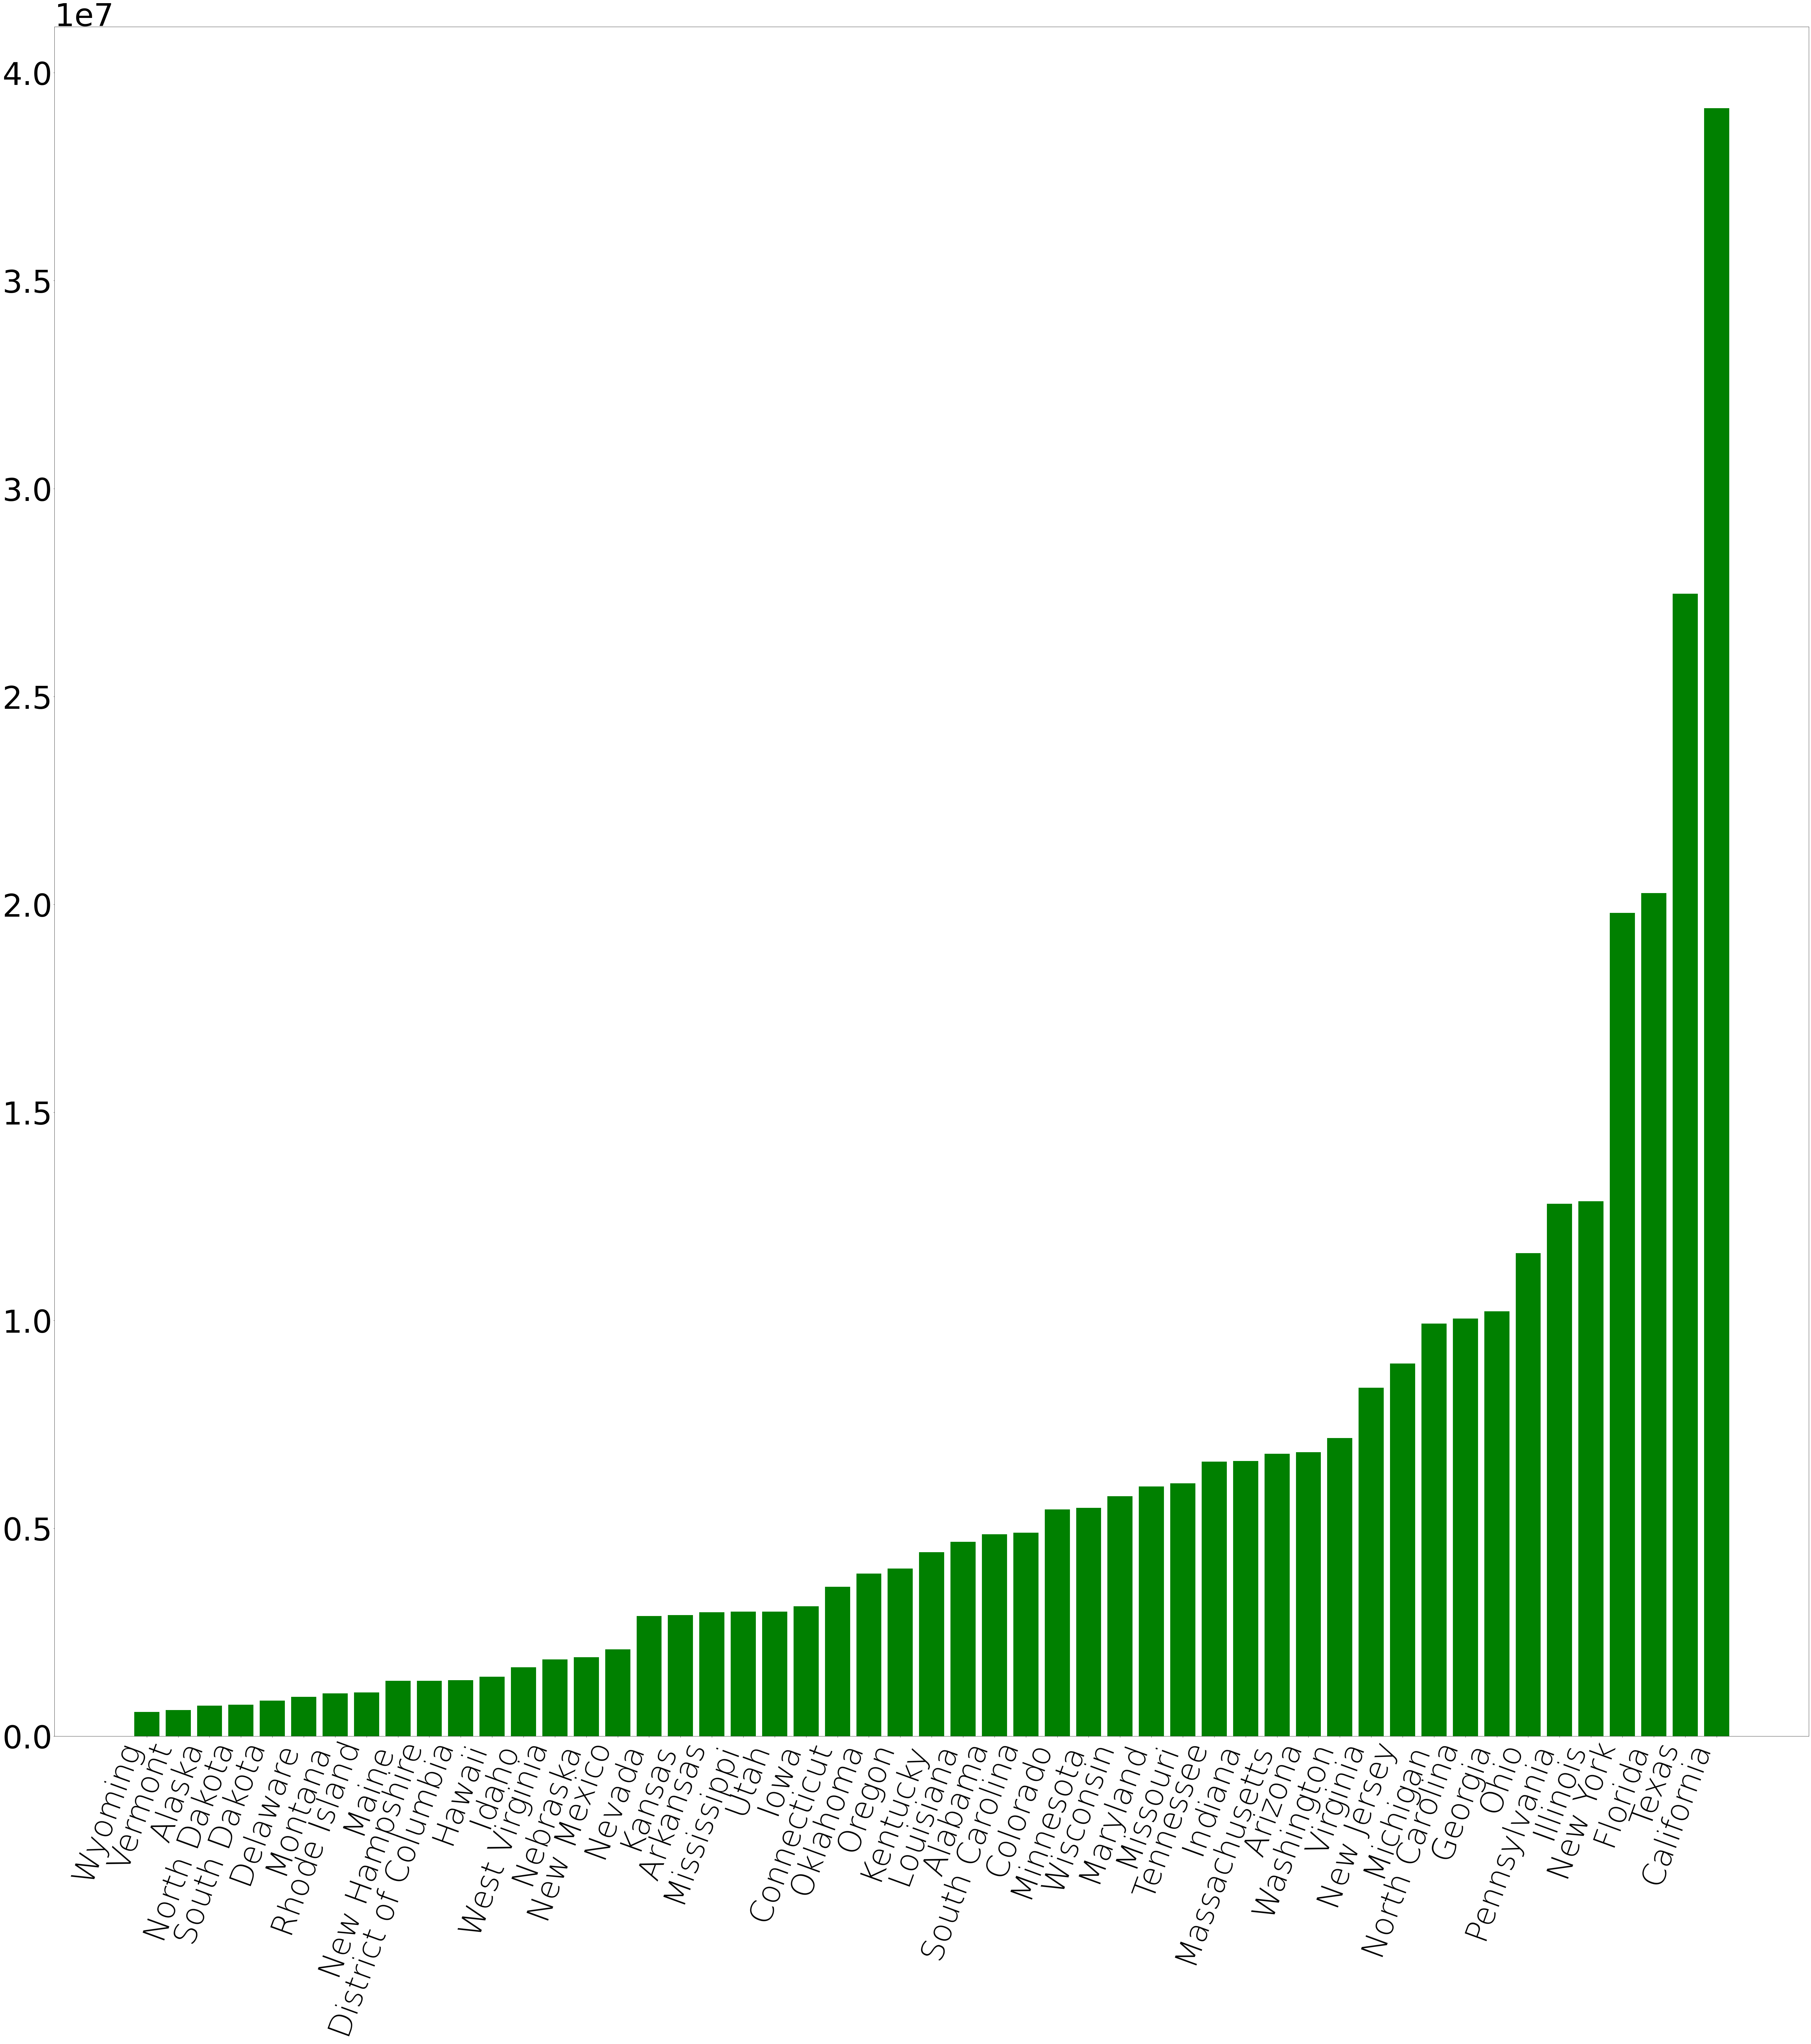

In [244]:
plt.bar(dict_.keys(), dict_.values(), color='g')
plt.xticks(
    rotation=70, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium' 
)
plt.show()

* California, Texas, Florida, New York, Illinois are top five.


* Wyoming, Vermont, Alaska, North Dakota, Delaware are bottom five.


* Just out of curiosity, which states have the greatest size of population in their counties? Let's view by mean and median basis.

In [250]:
# On a mean basis...

def avg_cty_population_by_state(df, col_name):
    dict_ = {}
    lst = list(df[col_name].unique())
    counter = 0 #will count how many instances there are
    for item in lst: #for each of the 51 states accounted for in the population
        dict_[item] = 0
        for row in range(len(df)): #for each row in the dataframe
            if df.iloc[row][col_name] == item and df.iloc[row]['CTYNAME'] != item: #if the state is the one we've just initialized in the dictionary
                counter += 1 #that is a county
                dict_[item] += int(df.iloc[row]['POPESTIMATE2015']) #add population estimate (should be of different counties)
            else:
                continue
        if counter == 0:
            dict_[item] = dict_[item]
        else:
            dict_[item] /= counter #make the key the sum divided by the amount of counties in the state, the mean
            counter = 0 #return counter to 0
    d_sorted_by_value = OrderedDict(sorted(dict_.items(), key=lambda x: x[1]))
    return d_sorted_by_value


dict_ = avg_cty_population_by_state(df, 'STNAME')

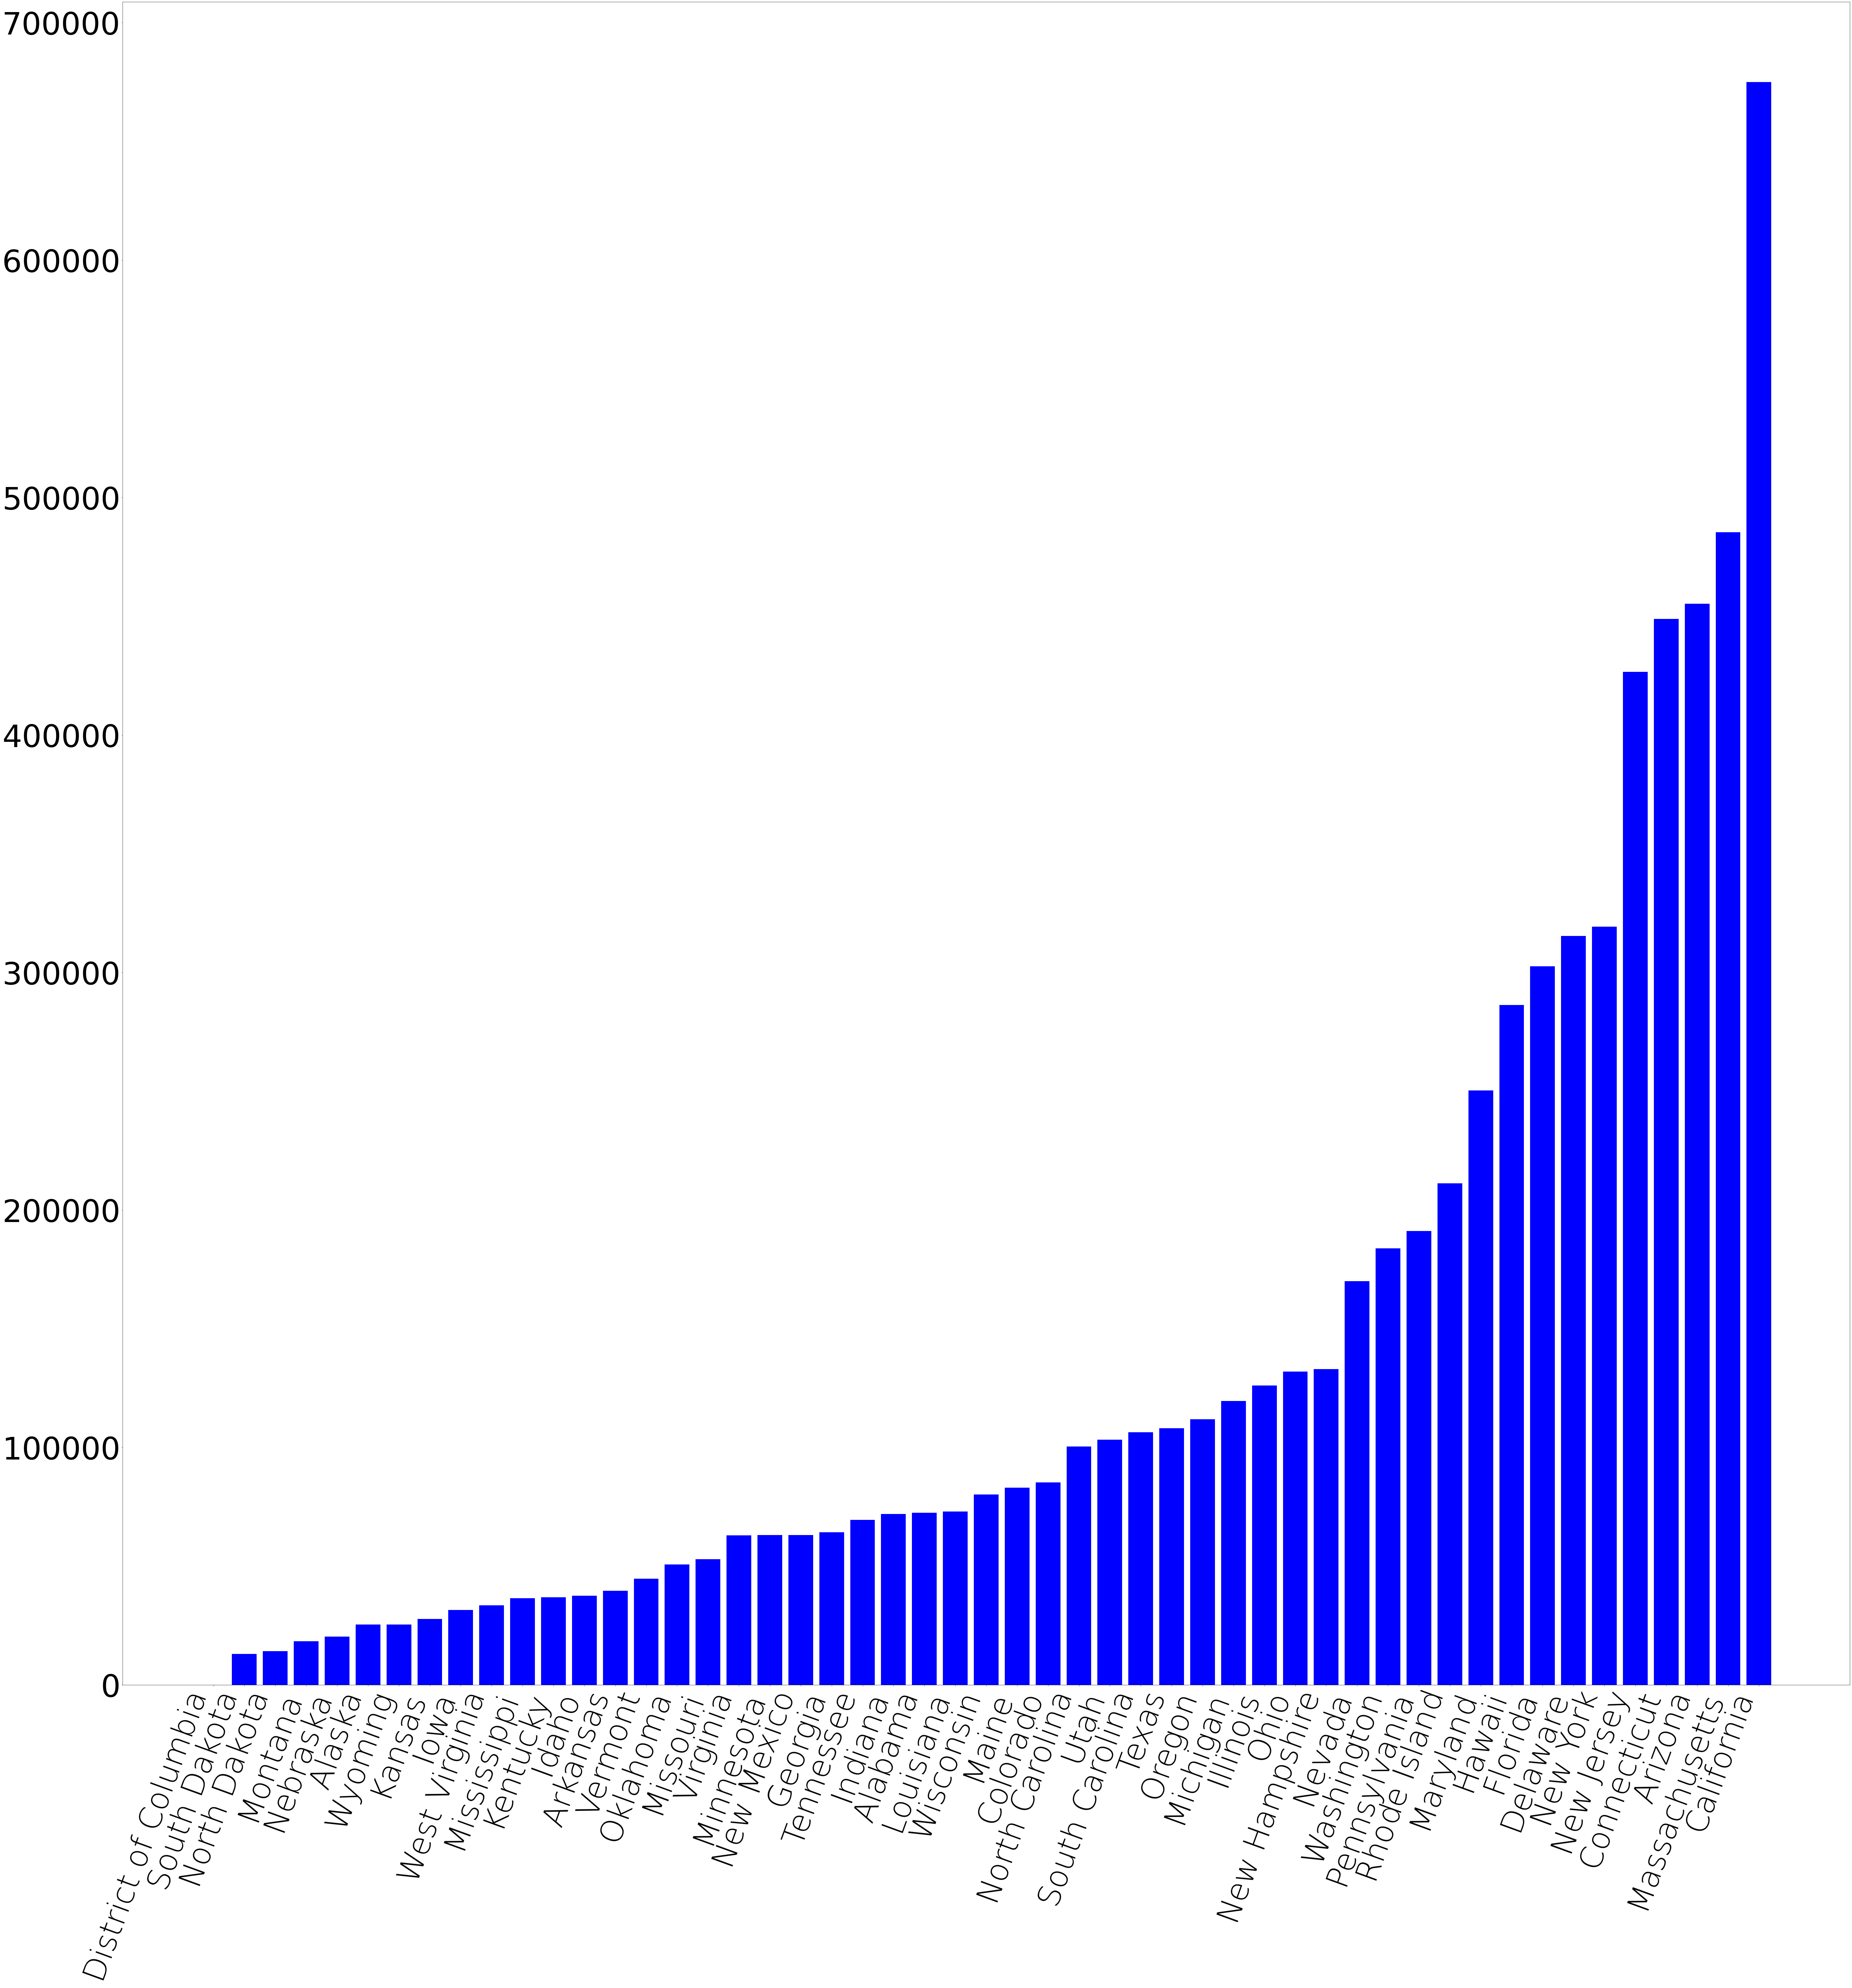

In [252]:
plt.bar(dict_.keys(), dict_.values(), color='blue')
plt.xticks(
    rotation=70, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium' 
)
plt.show()

* District of Columbia does not contain counties, and is actually considered a county itself for data purposes.


* California, Massachusetts, Arizona, Connecticut, New Jersey are top five.


* DC, South Dakota, North Dakota, Montana, Delaware are bottom five.

In [263]:
# On a median basis...

import statistics

def median_cty_population_by_state(df, col_name):
    dict_ = {}
    lst = list(df[col_name].unique())
    for item in lst: #for each of the 51 states accounted for in the population
        dict_[item] = []
        for row in range(len(df)): #for each row in the dataframe
            if df.iloc[row][col_name] == item and df.iloc[row]['CTYNAME'] != item: #if the state is the one we've just initialized in the dictionary
                num = df.iloc[row]['POPESTIMATE2015']
                dict_[item] += [num] #add population estimate as list (should be of different counties)
            else:
                continue
        if not dict_[item]:
            dict_[item] = 0
        else:
            dict_[item] = statistics.median(dict_[item]) #make the key the sum divided by the amount of counties in the state, the mean
    d_sorted_by_value = OrderedDict(sorted(dict_.items(), key=lambda x: x[1]))
    return d_sorted_by_value

dict_ = median_cty_population_by_state(df, 'STNAME')

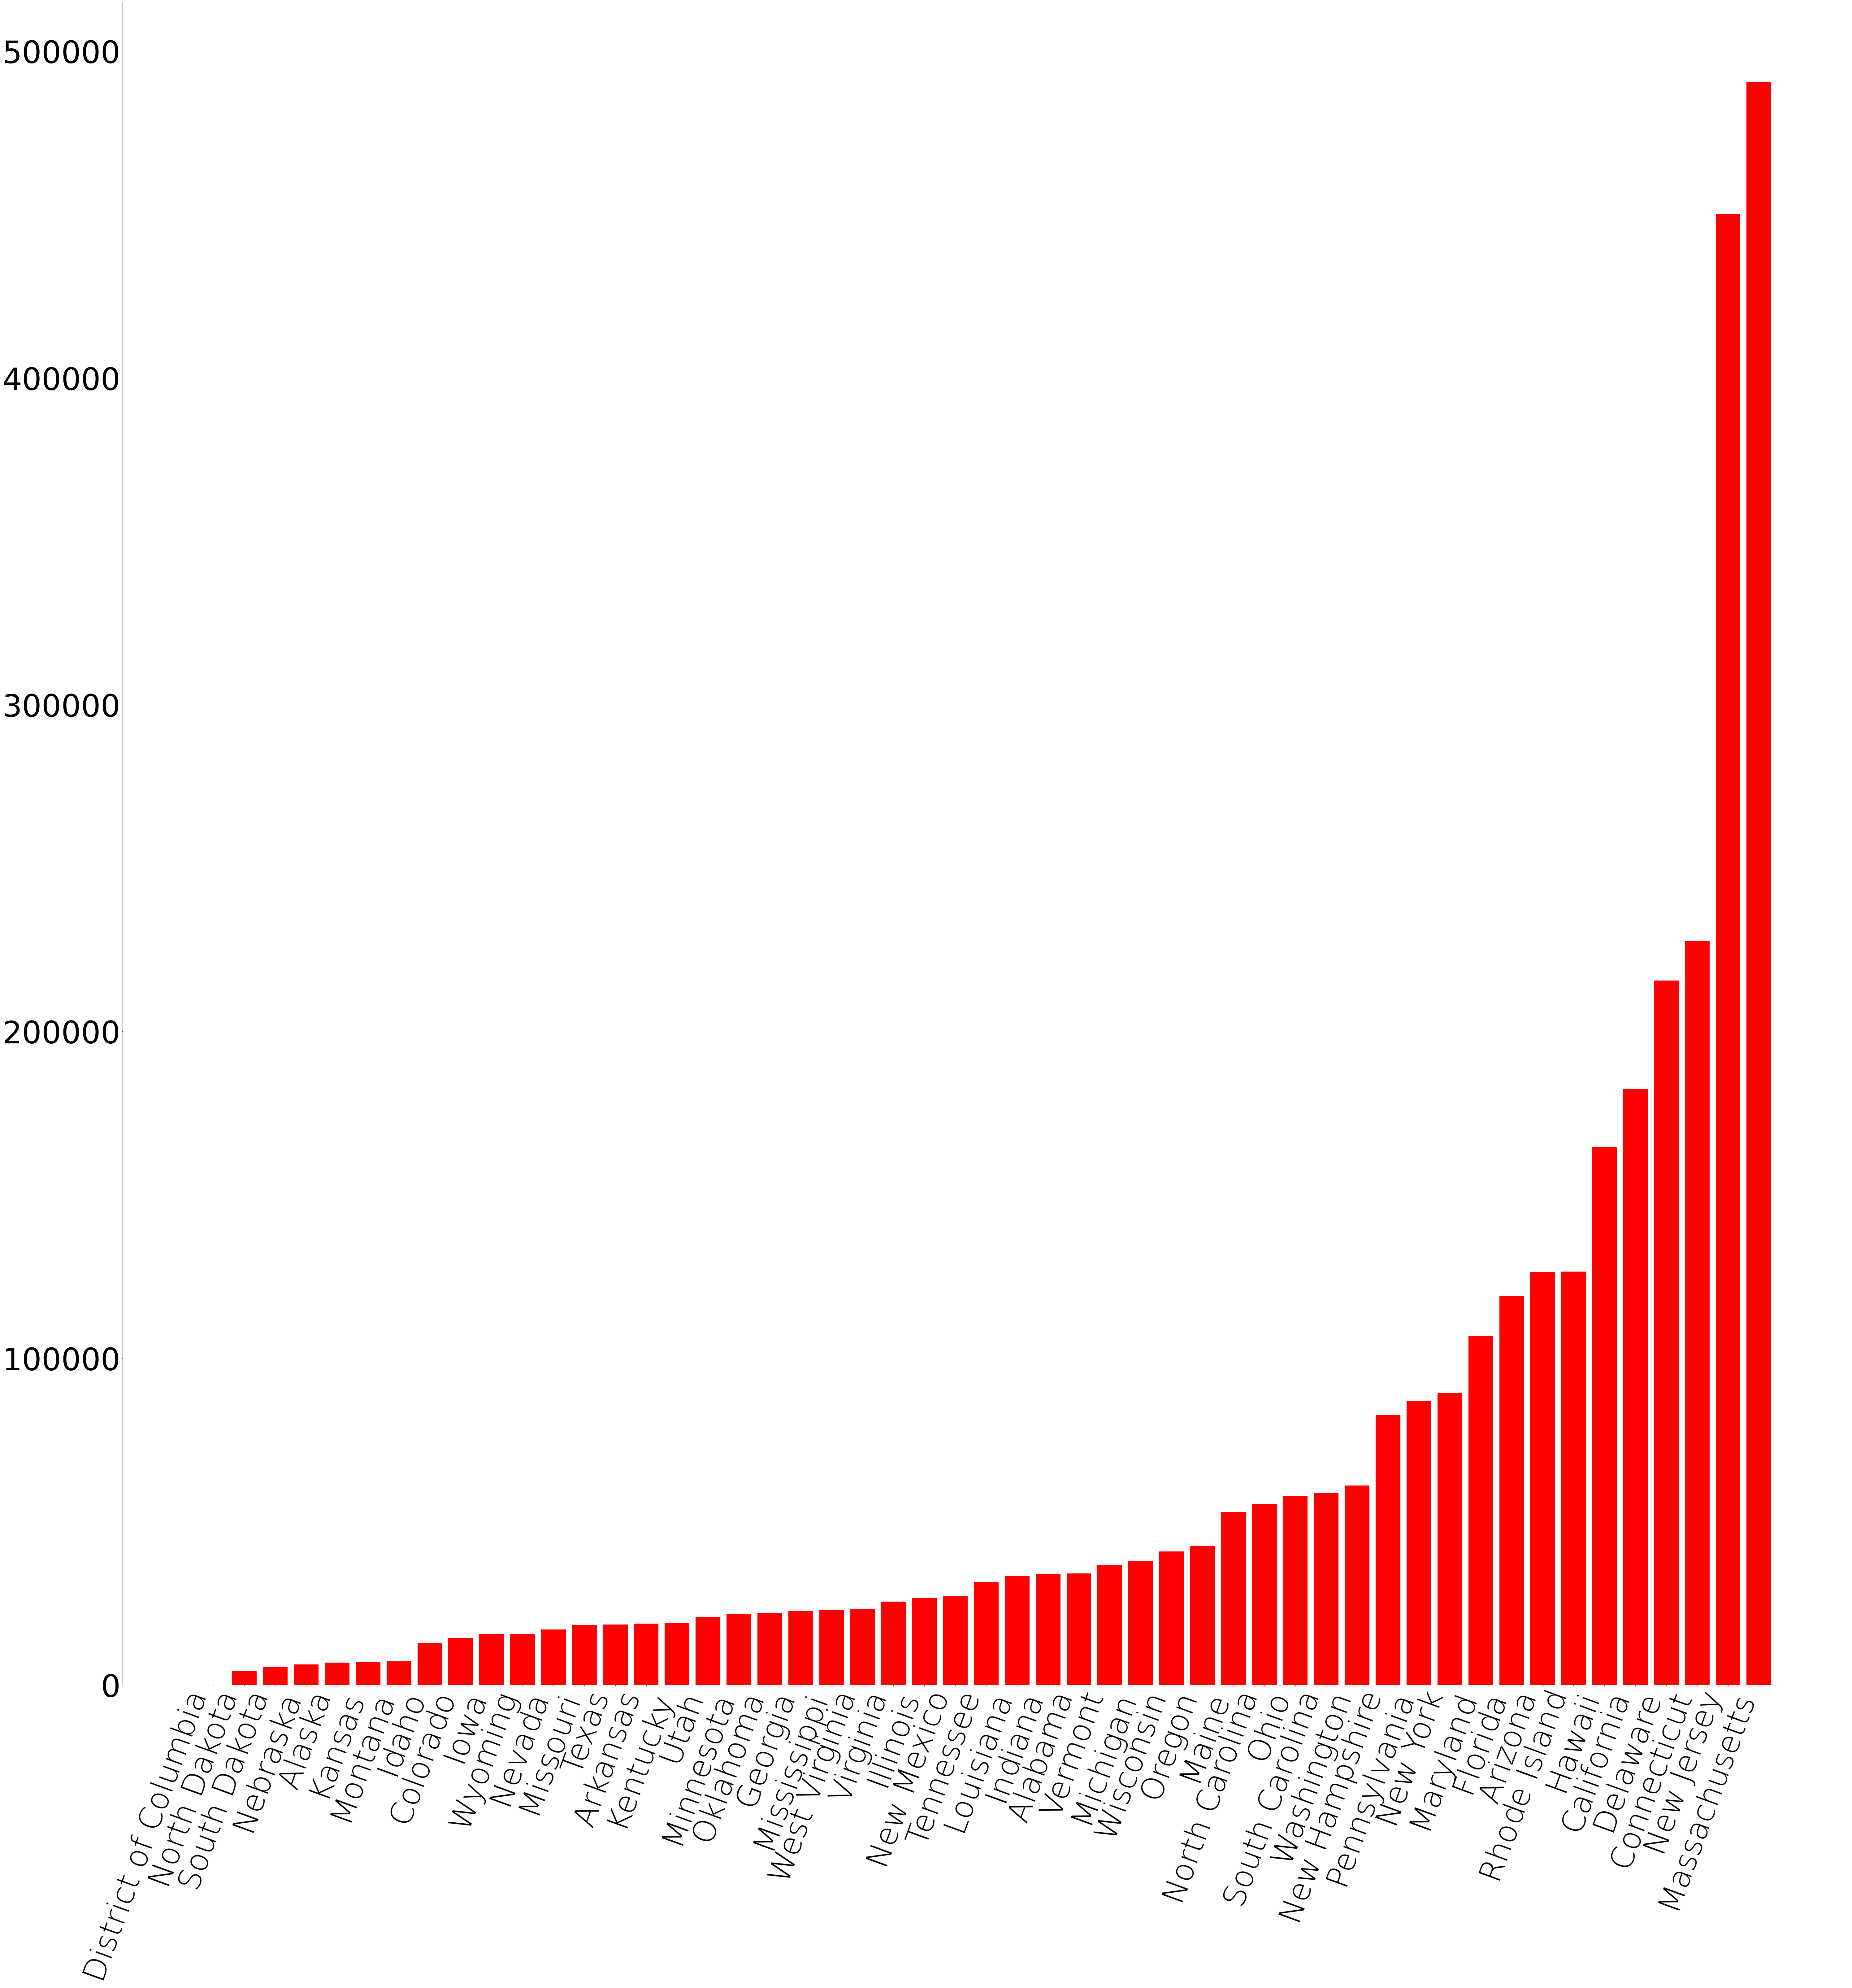

In [266]:
plt.bar(dict_.keys(), dict_.values(), color='red')
plt.xticks(
    rotation=70, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium' 
)
plt.show()

* District of Columbia does not contain counties, and is actually considered a county itself for data purposes.


* Massachusetts, New Jersey, Connecticut, Delaware, California are top five.


* DC, North Dakota, South Dakota, Nebraska, Alaska are bottom five.


* Have a vision in mind of lines superimposed and comparing positions of each state in each measurement.

### Conclusion

* Most of the births are occurring in Region 3 (the deep south, including Texas, Florida, Georgia, North Carolina), measured at approximately 40%. Additionally, most of the deaths are occurring in Region 3.


* Interesting note - there are more counties in Region 2 (North/South Dakota, midwestern/middle america states) than Region 4 (California, western states), yet there are more births in Region 4; there are more deaths in Region 2.


* All regions experienced net births during the 2010-2015 period; Region 4 (western states) closely followed Region 3.


* International migration was strong nationwide; however, domestic migration struggled in Region 1 and Region 2 (Middle America, New England states).